In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
tcs = yf.download("TCS.NS", start="2023-01-01", end="2024-10-10")
print(tcs.head())
#duplicate_prices = df[df_copy.duplicated('Close')]
#print(duplicate_prices)

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-02  3261.000000  3266.850098  3235.199951  3261.449951  3104.663574   
2023-01-03  3252.000000  3320.000000  3245.300049  3311.350098  3152.165283   
2023-01-04  3306.699951  3327.350098  3286.199951  3314.649902  3155.306641   
2023-01-05  3330.199951  3337.300049  3281.949951  3311.100098  3151.927246   
2023-01-06  3300.000000  3301.550049  3200.000000  3211.550049  3057.162842   

             Volume  
Date                 
2023-01-02   709547  
2023-01-03  1245178  
2023-01-04  1231668  
2023-01-05  1826057  
2023-01-06  2488376  


DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-30',
               '2024-10-01', '2024-10-03', '2024-10-04', '2024-10-07',
               '2024-10-08', '2024-10-09'],
              dtype='datetime64[ns]', name='Date', length=435, freq=None)
-7.2001953125


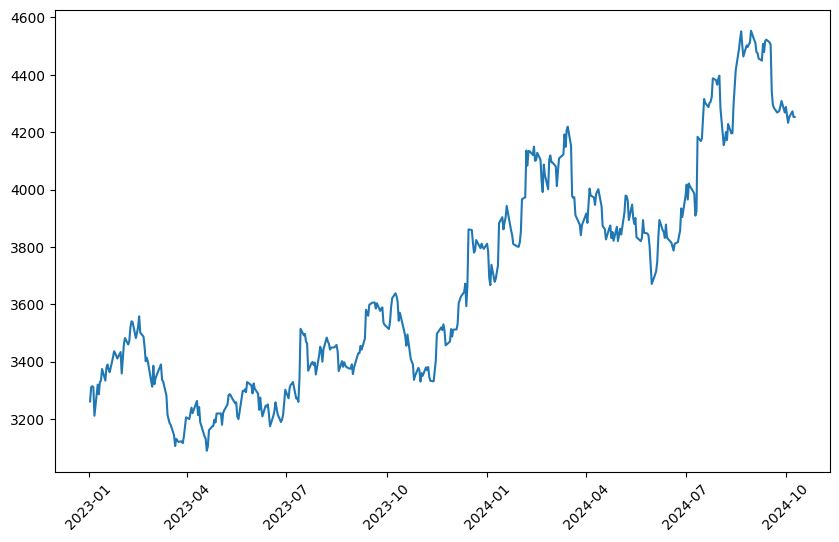

In [2]:
#data pre-processing step
df_copy = tcs.copy()
#indexing
df_copy = df_copy.reset_index()
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy.set_index('Date', inplace=True)
df_copy = df_copy['Close'].to_frame()
print(df_copy.index)
#print(df_copy.loc['17-02-23'])

#df_copy1 = df_copy['Close'] > 3750
#df_copy2 = df_copy['Close'] < 3800
#df_copy3 = df_copy1 & df_copy2
#print(df_copy[df_copy3])
plt.figure(figsize=(10, 6))
plt.plot(df_copy.index,df_copy['Close'])
plt.xticks(rotation=45)
#closing_price = df_copy.loc[(df_copy.index == '2022-01-31'), 'Close']

# Display the result
#print(closing_price)
#df_filter1 = df_copy[(df_copy.index >= '2023-02-01') & (df_copy.index <= '2023-02-28')]
#print(df_filter1)
#df_filter2 = df_filter1[(df_filter1['Close'] >= 3501) & (df_filter1['Close'] <= 3502)]
#print(df_filter2.index)
'''filtered_df = df_copy[(df_copy['Close'] >= 3502.0) & (df_copy['Close'] <= 3502.75)]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['Close'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Time-Series of Closing Prices between 3502.0 and 3502.75')
plt.grid(True)
plt.show()'''

df_copy['Closing Diff'] = df_copy['Close'].diff()
date = '2024-09-09'
derivative = df_copy.loc[date,'Closing Diff']
print(derivative)
#req_date = df_copy[(df_copy['Close'] >= 3501.75) & (df_copy['Close'] <= 3502.75)]
#print(req_date.index)

In [3]:
from pmdarima.arima import auto_arima
model = auto_arima(df_copy['Close'],seasonal=False,trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4551.646, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4553.360, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4553.345, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4550.733, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4554.628, Time=0.64 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.862 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  435
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2274.366
Date:                Sat, 02 Nov 2024   AIC                           4550.733
Time:                        00:06:53   BIC                           4554.806
Sample:                             0   HQIC                          4552.340
               

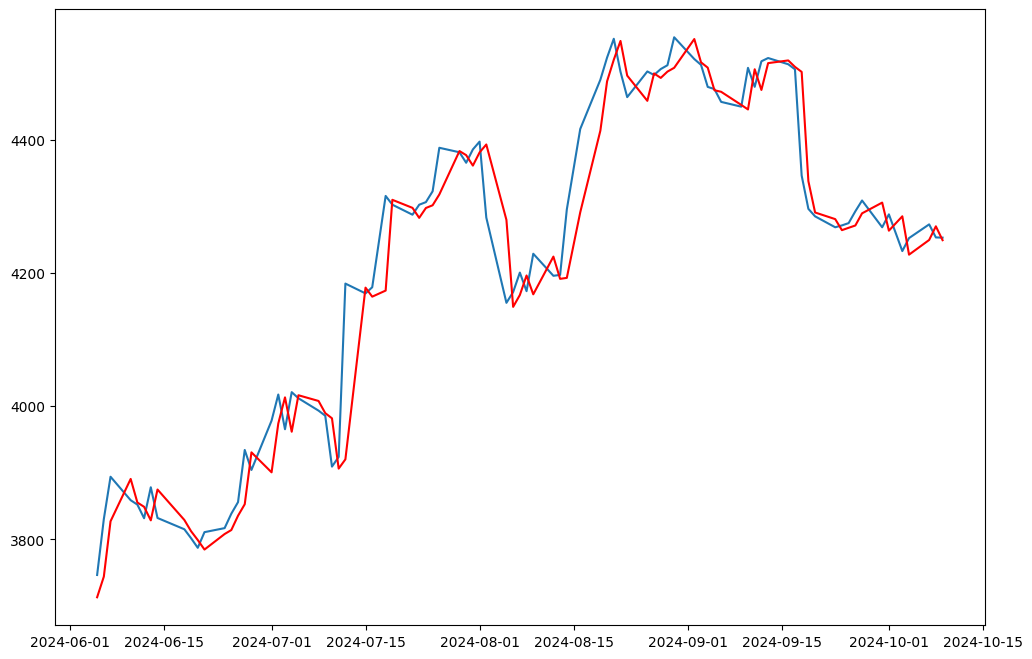

In [19]:
import numpy as np
def arima_forecast(history):
    model = ARIMA(history,order=(1,0,1))
    model_fit= model.fit()

    #make predictions
    output = model_fit.forecast()
    y_hat = output[0]
    return y_hat
#split data 
X = df_copy['Close'].values
size = (int(len(X)*0.8))
train,test = X[0:size],X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    #generate prediction
    y_hat = arima_forecast(history)
    predictions.append(y_hat)
    obs = test[t]
    history.append(obs)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8),dpi=100)
plt.plot(df_copy[size:].index,test,label='Real')
plt.plot(df_copy[size:].index,predictions,color='red',label='Predictions')
plt.show()


